In [1]:
from datasets import load_dataset

In [2]:
from huggingface_hub import HfApi

# HfApi Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
api = HfApi()

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖã Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞ (generatorÎ•º Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò)
datasets_list = list(api.list_datasets())

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∞úÏàò Ï∂úÎ†•
print(f"Total number of datasets: {len(datasets_list)}")


Total number of datasets: 224958


In [3]:
datasets_list[:1]

[DatasetInfo(id='LLM360/TxT360', author='LLM360', sha='7af09a9e7ba4565c667fd6c93cefc727bcb3bd81', created_at=datetime.datetime(2024, 10, 3, 16, 4, 34, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 10, 10, 19, 13, 53, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=6147, downloads_all_time=None, likes=98, paperswithcode_id=None, tags=['license:odc-by', 'region:us'], trending_score=98, card_data=None, siblings=None)]

In [4]:
emotion=load_dataset("emotion")

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds=emotion['train']

In [7]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds[:1])

{'text': ['i didnt feel humiliated'], 'label': [0]}


In [11]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [12]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [13]:
import pandas as pd

In [14]:
emotion.set_format(type="pandas")

In [15]:
df = emotion['train'][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [16]:
def label_int2str(row):
    return emotion["train"].features['label'].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)

In [17]:
df.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

## ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏

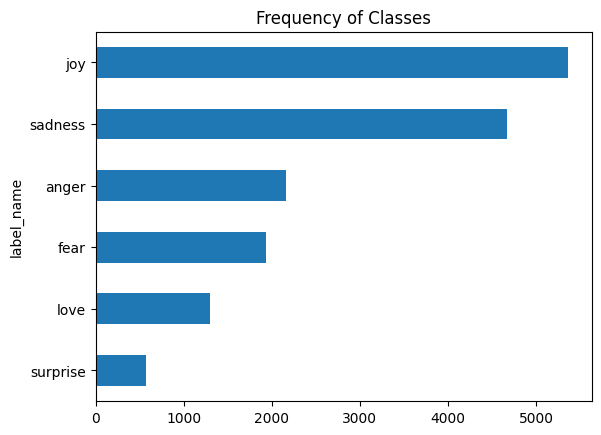

In [18]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [19]:
'''
Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î∂àÍ∑†ÌòïÏù¥ Ïã¨ÌïòÍ≤å Î≥¥Ïù∏Îã§. 
1. ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º ÎûúÎç§ÌïòÍ≤å Ïò§Î≤Ñ ÏÉòÌîåÎßÅ ÌïúÎã§.
2. Îã§Ïàò ÌÅ¥ÎûòÏä§Î•º ÎûúÎç§ÌïòÍ≤å Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌïúÎã§.
3. ÌÅ¥ÎûòÏä§Ïùò ÎåÄÌëúÏÑ±Ïù¥ Î∂ÄÏ°±ÌïòÎã§Î©¥ Î†àÏù¥Î∏îÎêú Îç∞Ïù¥ÌÑ∞Î•º Îçî ÎßéÏù¥ ÏàòÏßëÌïúÎã§.

>>> imbalanced-learn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôúÏö©(https://oreil.ly/5XBhb)
Îã§Îßå ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóêÎäî ÏÉòÌîåÎßÅ Ï†ÑÎûµÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÏïàÎêúÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Î∂ÑÌï† ÏÇ¨Ïù¥Ïóê ÎßéÏùÄ Ï†ïÎ≥¥Í∞Ä ÏÉàÎÇòÍ∞ÑÎã§.
ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÎßå ÏÉòÌîåÎßÅ Ï†ÑÎûµÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏.

Ìä∏ÎûòÏù∏, ÌÖåÏä§Ìä∏Î°ú Î∂ÑÌï†ÌïòÍ≥† Ìä∏ÎûòÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Î∂àÍ∑†ÌòïÏùÑ Ìï¥ÏÜåÌïúÎã§.
'''

'\nÎç∞Ïù¥ÌÑ∞ÏÖãÏùò Î∂àÍ∑†ÌòïÏù¥ Ïã¨ÌïòÍ≤å Î≥¥Ïù∏Îã§. \n1. ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º ÎûúÎç§ÌïòÍ≤å Ïò§Î≤Ñ ÏÉòÌîåÎßÅ ÌïúÎã§.\n2. Îã§Ïàò ÌÅ¥ÎûòÏä§Î•º ÎûúÎç§ÌïòÍ≤å Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌïúÎã§.\n3. ÌÅ¥ÎûòÏä§Ïùò ÎåÄÌëúÏÑ±Ïù¥ Î∂ÄÏ°±ÌïòÎã§Î©¥ Î†àÏù¥Î∏îÎêú Îç∞Ïù¥ÌÑ∞Î•º Îçî ÎßéÏù¥ ÏàòÏßëÌïúÎã§.\n\n>>> imbalanced-learn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôúÏö©(https://oreil.ly/5XBhb)\nÎã§Îßå ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóêÎäî ÏÉòÌîåÎßÅ Ï†ÑÎûµÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÏïàÎêúÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Î∂ÑÌï† ÏÇ¨Ïù¥Ïóê ÎßéÏùÄ Ï†ïÎ≥¥Í∞Ä ÏÉàÎÇòÍ∞ÑÎã§.\nÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÎßå ÏÉòÌîåÎßÅ Ï†ÑÎûµÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏.\n\nÌä∏ÎûòÏù∏, ÌÖåÏä§Ìä∏Î°ú Î∂ÑÌï†ÌïòÍ≥† Ìä∏ÎûòÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Î∂àÍ∑†ÌòïÏùÑ Ìï¥ÏÜåÌïúÎã§.\n'

## ÌÅ¥ÎûòÏä§Î≥Ñ Í∏∏Ïù¥ ÌôïÏù∏

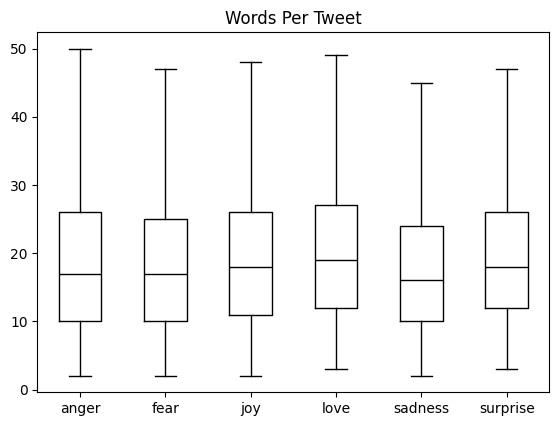

In [20]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by= "label_name",grid = False,
          showfliers=False, color ="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

## Î¨∏Ïûê ÌÜ†ÌÅ∞Ìôî

In [21]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [22]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [23]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


## Torch onehot

In [24]:
import torch
import torch.nn.functional as F

In [25]:
input_ids=torch.tensor(input_ids)
one_hot_encoding = F.one_hot(input_ids, num_classes=len(token2idx))
print(one_hot_encoding.shape)

torch.Size([38, 20])


In [26]:
print(f"ÌÜ†ÌÅ∞ : {tokenized_text[0]}")
print(f"ÌÖêÏÑú Ïù∏Îç±Ïä§ : {input_ids[0]}")
print(f"ÏõêÌï´ Ïù∏ÏΩîÎî© : {one_hot_encoding[0]}")

ÌÜ†ÌÅ∞ : T
ÌÖêÏÑú Ïù∏Îç±Ïä§ : 5
ÏõêÌï´ Ïù∏ÏΩîÎî© : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Îã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî

In [27]:
tokenized_text=text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [28]:
'''
Ïñ¥ÌúòÏÇ¨Ï†ÑÏù¥ ÌÅ¨Î©¥ Ïã†Í≤ΩÎßùÏùò ÌååÎùºÎØ∏ÌÑ∞ Ïó≠Ïãú ÎßéÏù¥ ÌïÑÏöîÌï¥Ï†∏ Î¨∏Ï†úÍ∞Ä ÎêúÎã§
Ï≤´Î≤àÏß∏ Ï∏µÏùò 100ÎßåÏ∞®Ïõê -> 1000Ï∞®ÏõêÏúºÎ°ú ÏïïÏ∂ïÌï¥ÏïºÌï† Îïå -> 100Îßå X 1000 = 10ÏñµÍ∞úÏùò Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑÎã§.
Ïù¥Îäî GPT-2Ïùò 15ÏñµÍ∞ú ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÑ Í∞ÄÏû• ÌÅ∞ GPT-2Î™®Îç∏Í≥º ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏù¥Îã§.
-> ÏûÖÎ†•Íµ¨Ï°∞Î•º Ïú†ÏßÄÌïòÎ©∞ Î¨∏Ïûê ÌÜ†ÌÅ∞ÌôîÏôÄ Îã®Ïñ¥ ÌÜ†ÌÅ∞ÌôîÎ•º Ï†àÏ∂©ÌïòÏó¨  Î∂ÄÎ∂ÑÎã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî(subword tokenization)Î•º ÏÇ¨Ïö©.
'''

'\nÏñ¥ÌúòÏÇ¨Ï†ÑÏù¥ ÌÅ¨Î©¥ Ïã†Í≤ΩÎßùÏùò ÌååÎùºÎØ∏ÌÑ∞ Ïó≠Ïãú ÎßéÏù¥ ÌïÑÏöîÌï¥Ï†∏ Î¨∏Ï†úÍ∞Ä ÎêúÎã§\nÏ≤´Î≤àÏß∏ Ï∏µÏùò 100ÎßåÏ∞®Ïõê -> 1000Ï∞®ÏõêÏúºÎ°ú ÏïïÏ∂ïÌï¥ÏïºÌï† Îïå -> 100Îßå X 1000 = 10ÏñµÍ∞úÏùò Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÑÎã§.\nÏù¥Îäî GPT-2Ïùò 15ÏñµÍ∞ú ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÑ Í∞ÄÏû• ÌÅ∞ GPT-2Î™®Îç∏Í≥º ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏù¥Îã§.\n-> ÏûÖÎ†•Íµ¨Ï°∞Î•º Ïú†ÏßÄÌïòÎ©∞ Î¨∏Ïûê ÌÜ†ÌÅ∞ÌôîÏôÄ Îã®Ïñ¥ ÌÜ†ÌÅ∞ÌôîÎ•º Ï†àÏ∂©ÌïòÏó¨  Î∂ÄÎ∂ÑÎã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî(subword tokenization)Î•º ÏÇ¨Ïö©.\n'

In [29]:
from transformers import AutoTokenizer

In [30]:
model_ckpt = "distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

In [31]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [32]:
text = "Tokenizing text is a core task of NLP."
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [33]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [34]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [35]:
tokenizer.vocab_size

30522

In [36]:
tokenizer.model_max_length

512

In [37]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [38]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)
    #Ìå®Îî© True -> ÏµúÎåÄ Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ìå®Îî©ÏùÑ ÎßûÏ∂§
    #truncation True -> ÏµúÎåÄ Î¨∏Îß• ÌÅ¨Í∏∞Ïóê ÎßûÏ∂∞ ÏÉòÌîåÏùÑ ÏûòÎùºÎÉÑ

In [39]:
emotions = load_dataset("emotion")

In [40]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [41]:
emotions_enconded = emotions.map(tokenize, batched=True, batch_size = None)

In [42]:
emotions_enconded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [43]:
emotions_enconded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Free Trained Model Load 

In [44]:
from transformers import AutoModel
import torch

In [45]:
model_ckpt='distilbert-base-uncased'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
model = AutoModel.from_pretrained(model_ckpt).to(device)

## ÏùÄÎãâÏÉÅÌÉú Ï∂îÏ∂ú

In [46]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"ÏûÖÎ†•ÌÖêÏÑú ÌÅ¨Í∏∞ : {inputs['input_ids'].size()}, [batch_size, n_tokens]")

ÏûÖÎ†•ÌÖêÏÑú ÌÅ¨Í∏∞ : torch.Size([1, 6]), [batch_size, n_tokens]


In [47]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [48]:
outputs.last_hidden_state.size() # [batch, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [49]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [50]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
                 if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [51]:
emotions_enconded.set_format("torch", columns =['input_ids','attention_mask','label'])

In [52]:
emotions_hidden = emotions_enconded.map(extract_hidden_states, batched = True)

In [53]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [54]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [55]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [56]:
# ÌäπÏÑ± Ïä§ÏºÄÏùºÏùÑ [0,1]Î≤îÏúÑÎ°ú Ï°∞Ï†ïÌïúÎã§
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†®ÌïúÎã§
mapper = UMAP(n_components=2,metric = "cosine").fit(X_scaled)

In [57]:
#2DÏûÑÎ≤†Îî©Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì≠ÎãàÎã§.
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb["label"]=y_train
df_emb.head()

X         Y  label
0  4.020042  6.542562      0
1 -3.377393  5.302121      0
2  5.031529  3.044889      3
3 -2.364352  3.659117      2
4 -3.451060  3.439537      3

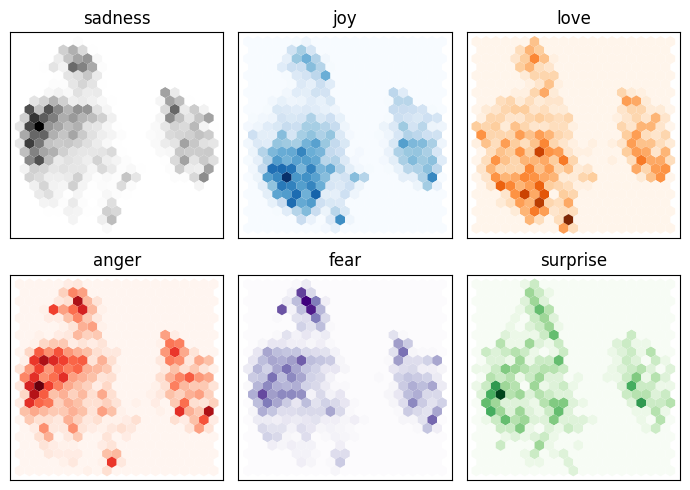

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6325

In [60]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)


0.352

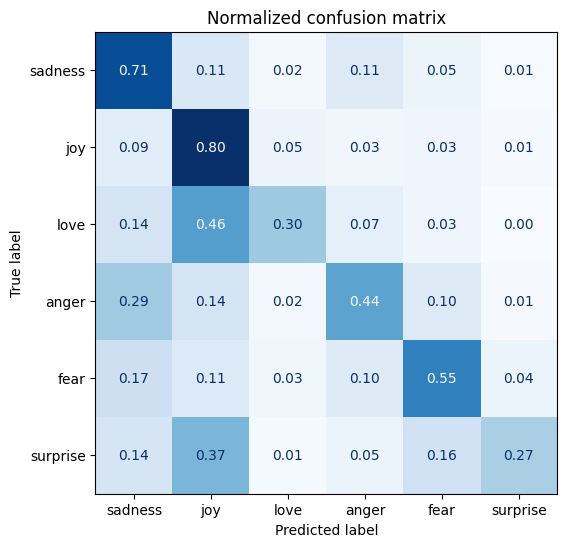

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [62]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model= (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [64]:
from huggingface_hub import notebook_login
notebook_login()

In [69]:

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_enconded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

/opt/conda/lib/python3.11/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [71]:

from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_enconded["train"],
                  eval_dataset=emotions_enconded["validation"],
                  tokenizer=tokenizer)
trainer.train();

In [72]:
preds_output = trainer.predict(emotions_enconded['validation'])

In [73]:
preds_output.metrics

{'test_loss': 0.20156268775463104,
 'test_accuracy': 0.9295,
 'test_f1': 0.9294461738386971,
 'test_runtime': 4.2194,
 'test_samples_per_second': 473.999,
 'test_steps_per_second': 7.584}

In [74]:
y_preds = np.argmax(preds_output.predictions , axis = 1)

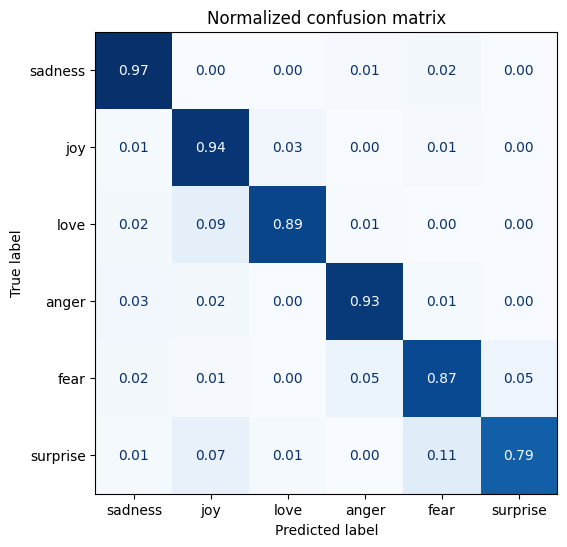

In [75]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [77]:

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Î™®Îì† ÏûÖÎ†• ÌÖêÏÑúÎ•º Î™®Îç∏Í≥º Í∞ôÏùÄ Ïû•ÏπòÎ°ú Ïù¥ÎèôÌï©ÎãàÎã§.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ïó¥Í≥º Ìò∏ÌôòÎêòÎèÑÎ°ù Ï∂úÎ†•ÏùÑ CPUÎ°ú ÏòÆÍπÅÎãàÎã§.
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [81]:

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïãú ÌååÏù¥ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
emotions_enconded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# ÏÜêÏã§ Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
emotions_enconded["validation"] = emotions_enconded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [84]:
emotions_enconded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_enconded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [85]:
df_test.sort_values("loss", ascending=False).head(10)


text     label  \
1963  i called myself pro life and voted for perry w...       joy   
1500  i guess we would naturally feel a sense of lon...     anger   
1950  i as representative of everything thats wrong ...  surprise   
1870  i guess i feel betrayed because i admired him ...       joy   
882   i feel badly about reneging on my commitment t...      love   
1111  im lazy my characters fall into categories of ...       joy   
318   i felt ashamed of these feelings and was scare...      fear   
1509  i guess this is a memoir so it feels like that...       joy   
1581  i feel stronger clearer but a little annoyed n...     anger   
1274  i am going to several holiday parties and i ca...       joy   

     predicted_label      loss  
1963         sadness  5.633858  
1500         sadness  5.451890  
1950         sadness  5.305404  
1870         sadness  5.196520  
882          sadness  5.018113  
1111            fear  4.934993  
318          sadness  4.792792  
1509            fear  4.728156  
1581             joy  4.622785  
1274         sadness  4.290321

In [86]:
df_test.sort_values("loss", ascending=True).head(10)


text    label  \
1466  i feel so ungrateful to be wishing this pregna...  sadness   
1452  i always feel guilty and come to one conclusio...  sadness   
1656  im feeling very jaded and uncertain about love...  sadness   
1310                  i feel like an ungrateful asshole  sadness   
1861  im tired of feeling lethargic hating to work o...  sadness   
21    i feel try to tell me im ungrateful tell me im...  sadness   
1140  i do think about certain people i feel a bit d...  sadness   
1502             i feel ungrateful for stupid shit like  sadness   
1368  i started this blog with pure intentions i mus...  sadness   
133   i and feel quite ungrateful for it but i m loo...  sadness   

     predicted_label      loss  
1466         sadness  0.016017  
1452         sadness  0.016353  
1656         sadness  0.016410  
1310         sadness  0.016434  
1861         sadness  0.016450  
21           sadness  0.016485  
1140         sadness  0.016570  
1502         sadness  0.016641  
1368         sadness  0.016647  
133          sadness  0.016676

In [87]:
trainer.push_to_hub(commit_message="Training completed!!")

CommitInfo(commit_url='https://huggingface.co/OHCHANG/distilbert-base-uncased-finetuned-emotion/commit/4e72b9740ffbd6bbe510221501603fe99c57c6c5', commit_message='Training completed!!', commit_description='', oid='4e72b9740ffbd6bbe510221501603fe99c57c6c5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/OHCHANG/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='OHCHANG/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [88]:
from transformers import pipeline

# `haesun`Î•º ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
model_id = "OHCHANG/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [91]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, top_k=None)

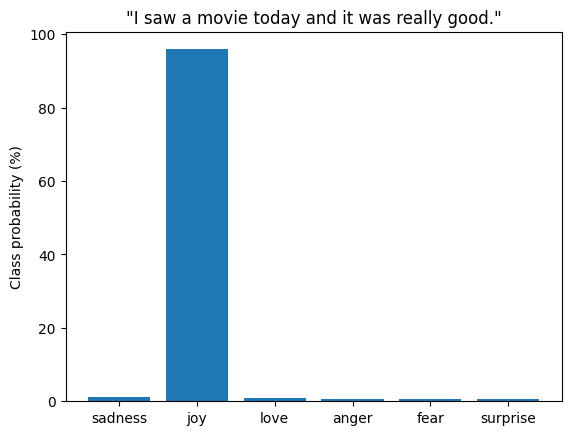

In [92]:
preds_sorted = sorted(preds, key=lambda d: d['label'])
preds_df = pd.DataFrame(preds_sorted)
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [93]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 